In [1]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

C:\Users\UserK\AppData\Local\Temp\ipykernel_14736\780980895.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


가상 데이터 생성

In [2]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
  'name': world.name,
  'pop': np.random.randint(100, 1000, len(world))
})

data.head()

,name,pop
0,Fiji,463
1,Tanzania,904
2,W. Sahara,849
3,Canada,332
4,United States of America,836


데이터 매핑

In [3]:
world_df = world.merge(data, on='name')  # 이름을 기준으로 병합
world_df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,pop
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",463
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",904
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",849
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",332
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",836


데이터 시각화

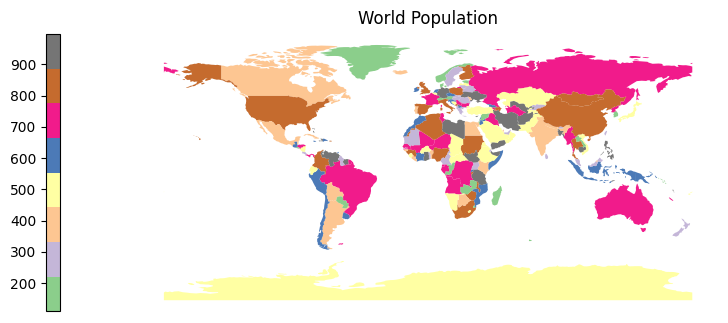

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
world_df.plot(ax=ax, column='pop', cmap='Accent', legend=False, alpha=0.9)
ax.set_title('World Population')
ax.set_axis_off()

cb = fig.colorbar(ax.collections[0], ax=ax, location="left", shrink=0.6)
plt.show()